## Introduction to data preprecessing
This notebook is intended to give those who are interested in data preprocessing a brief introdiction of this topic.
In this notebook, I'll cover some basic statistic concepts that are commonly used when doing data preprocessing.
I'm new to this category, so if I made anything wrong, feel free to tell me. :)<br>
These are what I'm going to introduce:
- Getting started
    - Let's review some basic terms in statistic! Including:
        - Mean, Median, Mode
        - Variance, Standard deviation
        - Skewness, Kurtosis
        - Interquartile range
        - Normal distribution
- Correlation
    - Why we don't like correlated variables?
- Normalization
    - What is normalization and how to do apply it?
- Skewed data
    - In this section, we'll introduce what skewed data is and how to handle skewed data. We'll cover:
        - right skewness
        - left skewness
- Conclusion
- Reference
    - Some great reference that I learned a lot from.

---

## Getting started
As a warm up, we'll review some commonly seen words in statistics.<br>
Before we go any further, let's import some libraries that we'll use later.

In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import mode, norm, skew, kurtosis
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
sns.set(color_codes=True, palette="deep")

### Mean, Median, Mode
- Mean is the the average value of all the data.
    - Becareful that mean is sensitive to outliers.
- Median is the middle value of all sorted data.
    - Median is robust to outliers and it can represent the central value of a distribution.
- Mode is the value that occurs the most of all the data.

Mean: 9.5483
Median: 10.0
Mode: ModeResult(mode=array([9]), count=array([539]))


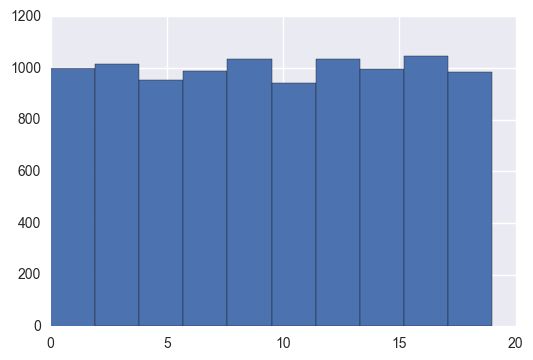

In [2]:
N = 10000
samples = np.random.randint(low=20, size=N)
print("Mean:", np.mean(samples))
print("Median:", np.median(samples))
print("Mode:", mode(samples))
_ = plt.hist(samples)

### Variance & Standard deviation
- Variance calculates how spread the data is.<br>
- Standard deviation is the square root of variance.

Variance: 0.993445413883
Square root of var: 0.996717318944
Standard deviation: 0.996717318944


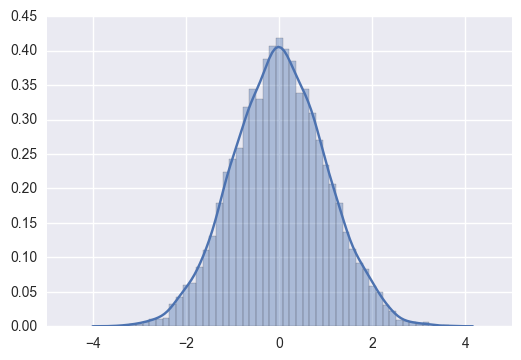

In [3]:
N = 10000
samples = np.random.randn(N)
print("Variance:", np.var(samples))
print("Square root of var:", np.sqrt(np.var(samples)))
print("Standard deviation:", np.std(samples))
sns.distplot(samples)

### Skewness & Kurtosis
- Skewness measures how asymmetry the data is.<br>
- Kurtosis measures how thick the tail is and how sharp the peak is.<br>
In normal distribution, the skewness and kurtosis are nearly equal to 0.
For testing skewness, we often set a threshold to do that.<br>
For instance, we set the variables that have skewness > 0.75 are called right skewness and thus do log tranformation.
We'll see how to deal with skewness later.

In [4]:
# skewness, kurtosis
print("Skewness:", skew(samples))
print("kurtosis:", kurtosis(samples))

Skewness: 0.015158188673235656
kurtosis: -0.0554130877460044


### Interquartile range
Interquartile range divids data into four quartiles, Q1, Q2 and Q3.
Q1 is the value on the 25%, Q2 is equals to mean, and so on.
A term IQR is used to measure outliers, which is equals to Q3 - Q1.
Data that are greater or smaller than 1.5 IQR are usually called outliers.

In [5]:
def cal_quartile(data, N):
    data = np.sort(data)
    num = int((len(data)/4)*N)
    return data[num]
def cal_outliers(data):
    outliers = 1.5*(cal_quartile(data, 3) - cal_quartile(data, 1))
    left_condition = data < -outliers
    right_condition = data > outliers
    return data[left_condition | right_condition]

Q1: -0.665095322864
Q2: 0.00817545938742
Q3: 0.681149060029
Number of outliers: 434


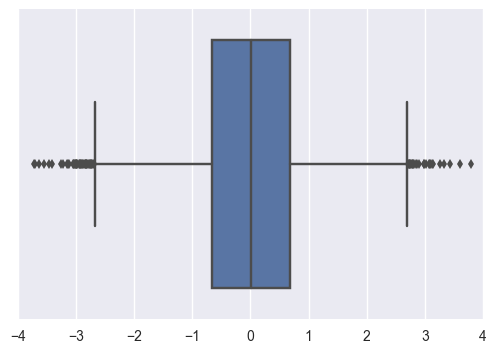

In [6]:
N = 10000
samples = np.random.randn(N)
sns.boxplot(samples)
print("Q1:", cal_quartile(samples, 1))
print("Q2:", cal_quartile(samples, 2))
print("Q3:", cal_quartile(samples, 3))
print("Number of outliers:", len(cal_outliers(samples)))

### Normal distribution
In many machine learning tasks, we hope that the data is normal-distribution like.
Normal distribution data can help the models learn better. (Since many models assume that the data is normal-distribution like.)<br>
#### What is normal distribution data?
A set of normal distributed data has several features:
- Belled-shape
- Mode is equal to median.
- 68-95-99.7 rule
    - 68% of the data is within mean +/- 1 std.
    - 95% of the data is within mean +/- 2 std.
    - 99.7% of the data is within mean +/- 3 std.
- Standard normal distribution is normal distribution with its mean=0 and std=1.

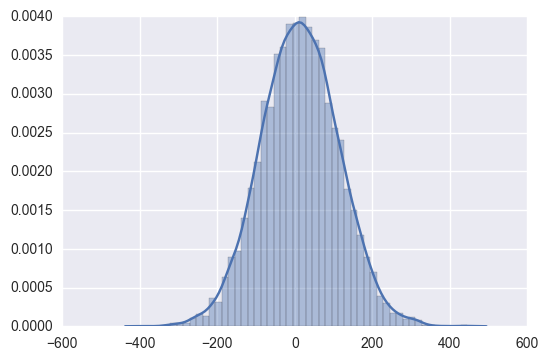

In [7]:
N = 10000
samples = np.random.normal(10, 100, N)
sns.distplot(samples)

Let's test the 68-95-99.7 rule using mean and std!

In [8]:
def cal_portion(data, num_std):
    mean = np.mean(data)
    std = np.std(data)
    left_condition = data >= (mean - num_std*std)
    right_condition = data <= (mean + num_std*std)
    return (len(data[(left_condition & right_condition)]) / len(data)) * 100

In [9]:
print("mean+/-1 std:", cal_portion(samples, 1))
print("mean+/-2 std:", cal_portion(samples, 2))
print("mean+/-3 std:", cal_portion(samples, 3))

mean+/-1 std: 68.64
mean+/-2 std: 95.64
mean+/-3 std: 99.64


Looks like the normal distribution that we created really follows the rule!

---

## Correlation
Correlation refers how much the **linear relationship** the two variables have with each other.
However, even if two variables x1, x2 have high correlation to each other, it doesn't mean that they have cause-effect relationship.
There might be another variable x3 that cause variable x1, x2's relationship.
Another words, x1, x3 and x2, x3 both have cause-effect relationship, and this relationship cause x1, x2 have correlation to each other.
As a result, x1 and x2 do not nessesarily have cause-effect relationship.<br>
### How to deal with correlation?
We want to eliminate variables with high correlation to each other.
If we ignore the correlated variables, it will cause collinearity problem.
Normally, we will remove the variable that has higher correlation to the variable that we're going to predict.
numpy provides us function to calculate correlation between two variables.<br>
eg. np.corrcoef(x1, x2)<br>
If you're using pandas, it also provides you a function to calculate the correlation among all features.<br>
eg. df = pd.read_csv("file"); correlation_matrix = df.corr()<br>
To visulize correlation matrix, a good way is to use seaborn heatmap.<br>
eg. sns.heatmap(df.corr())

Correlation
[[ 1.          0.02976165]
 [ 0.02976165  1.        ]]


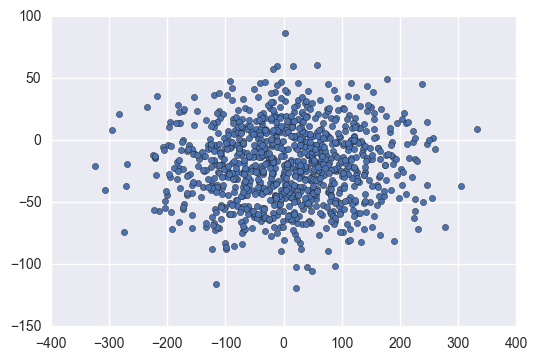

In [10]:
N = 1000
x1 = np.random.normal(10, 100, N)
x2 = np.random.normal(-20, 30, N)
plt.scatter(x1, x2)
print("Correlation")
print(np.corrcoef(x1, x2))

#### Try with real data!
target = Loading bosten dataset from sklearn and list the highest K correlated data.

In [11]:
bosten = datasets.load_boston()
print(bosten.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [12]:
df = pd.DataFrame(bosten.data, columns=bosten.feature_names)
df['Price'] = bosten.target
print("Boston dataset consists of", df.shape[0], "samples and has", df.shape[1], "features.")

Boston dataset consists of 506 samples and has 14 features.


In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


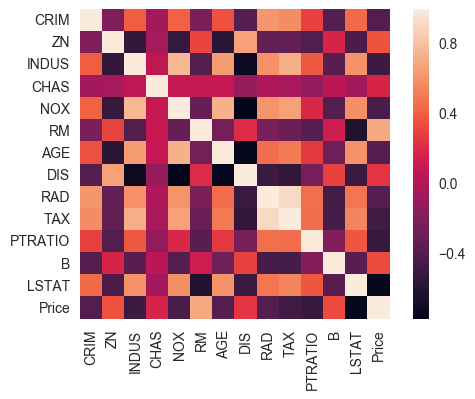

In [14]:
corr = df.corr()
sns.heatmap(corr, square=True)

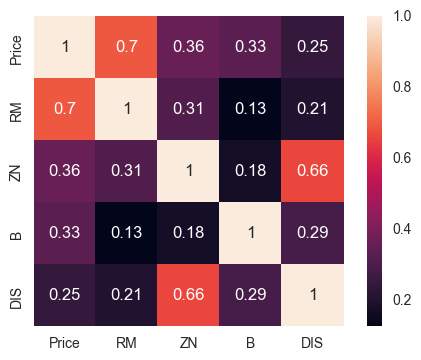

In [15]:
cols = corr.nlargest(5, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, square=True, annot=True, xticklabels=cols.values, yticklabels=cols.values)

---

## Normalization
When we want to compare variables in different units, it is hard for us to measure the difference level.
However, with normalization, we eliminate units and thus can do some calculation on those variables.
In machine learning tasks, numerical features usually consist of different units.
For those features which have larger number, they will get relatively small weights compare to those which have smaller number. 
To train a better and more rebust model, we normally have to do normalization on our data.<br>
As a reminder: Normalization won't change the distribution of data, so don't worry about it:).

In [16]:
# generating samples from normal distribution
N = 10000
mean = 10
std = 50
samples = np.random.normal(mean, std, N)

Let's see how data looks like before doing normalization.

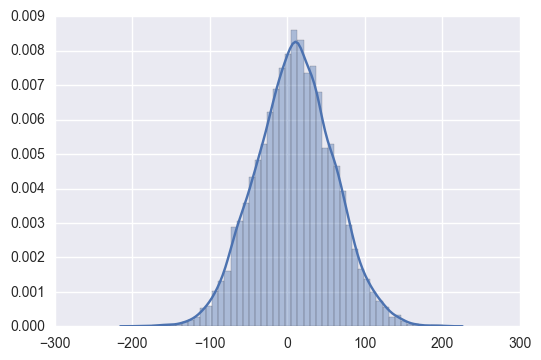

In [17]:
sns.distplot(samples)

To do normalization, we first have to calculate the distribution's mean and std.

In [18]:
mean = np.mean(samples)
std = np.std(samples)
print("mean:", mean)
print("std:", std)

mean: 10.1220460829
std: 49.8198603233


Then, we minus the mean and divid by the std of the data.

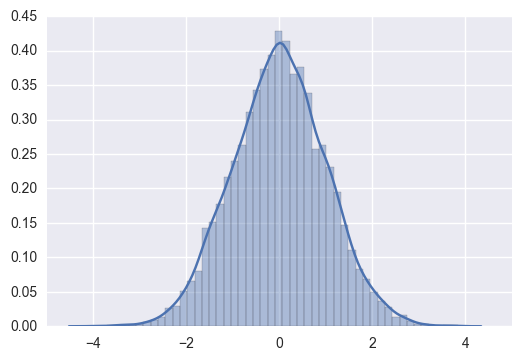

In [19]:
nomalized_samples = (samples - mean)/std
sns.distplot(nomalized_samples)

---

## Skewed data
In real life, however, not all data is normal-distributed.
As a result, we may want to apply data transformation to handle non-normal distributed data.
In this section, we'll going to deal with skewed data by making fake data using chisquare and beta distribution.
Don't be afraid if you haven't seen any of these distribution.
We only use the distribution for plotting purpose.

### Right skewed
Right skewed is also known as positive skewed.
To transform right skewed data, we often use log transform.
To generate fake right skewed data, we can use chisquare distribution function provided by numpy.
In chisquare distribution, degrees of freedom(df) controls the shape of distribution looks like.
The larger the df is, the smiliar it looks like normal distribution.

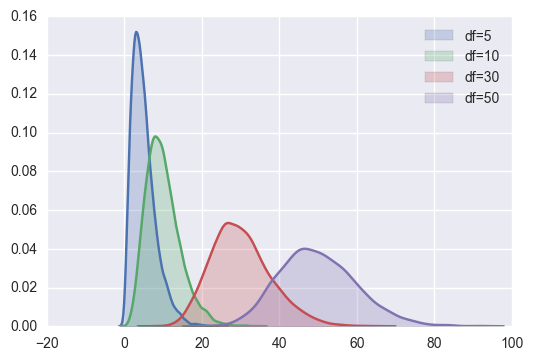

In [20]:
N = 10000
df = 5
sns.kdeplot(np.random.chisquare(df, N), shade=True)
sns.kdeplot(np.random.chisquare(df*2, N), shade=True)
sns.kdeplot(np.random.chisquare(df*6, N), shade=True)
sns.kdeplot(np.random.chisquare(df*10, N), shade=True)
legend_labels = ['df=5', 'df=10', 'df=30', 'df=50']
plt.legend(legend_labels)

Mean: 4.97892042746 Variance: 9.94594974475
Skewness: 1.2370935570470045 Kurtosis: 2.118898157358439


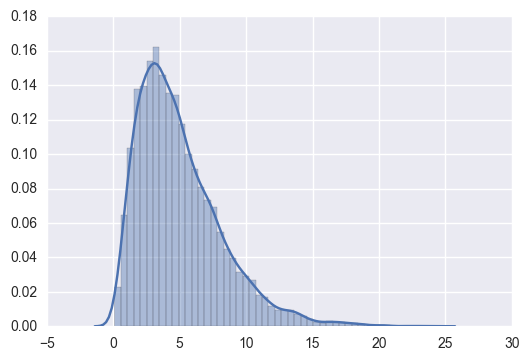

In [21]:
N = 10000
df = 5
samples = np.random.chisquare(df, N)
sns.distplot(samples)
print("Mean:", np.mean(samples), "Variance:", np.var(samples))
print("Skewness:", skew(samples), "Kurtosis:", kurtosis(samples))

Mean: 1.83185547447 Variance: 0.19301743626
Skewness: 0.0704278579055576 Kurtosis: -0.40600919046245254


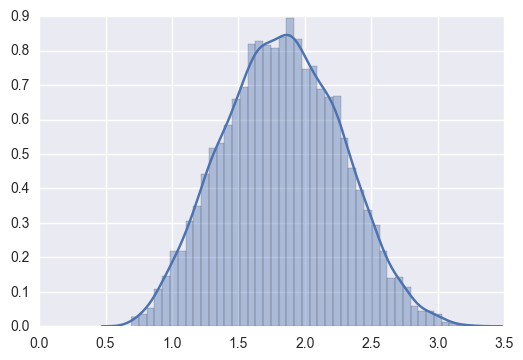

In [22]:
# Since we cannot have negative value in log, we have to shift the data.
log_samples = np.log1p(samples - min(samples) + 1)
sns.distplot(log_samples)
print("Mean:", np.mean(log_samples), "Variance:", np.var(log_samples))
print("Skewness:", skew(log_samples), "Kurtosis:", kurtosis(log_samples))

Looks like the log transform performs really well!

### Left skewness
Left skewness is also known as negative skewness.
We use square or cubes or even higher powers to deal with it.
numpy also has a left skewed data distribution function, which is called beta distribution.
In beta distribution, the parameter alpha controls how steep the distributions is, while beta controls how spread the data are.

High alpha alongs with low beta creates left skewed data.


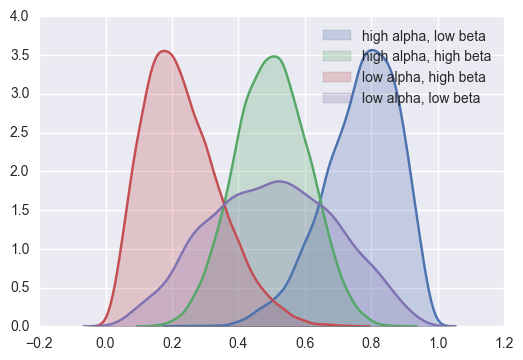

In [23]:
N = 10000
alpha = [10, 10, 3, 3]
beta = [3, 10, 10, 3]
for a, b in zip(alpha, beta):
    sns.kdeplot(np.random.beta(a, b, N), shade=True)
plt.legend(["high alpha, low beta", "high alpha, high beta", "low alpha, high beta", "low alpha, low beta"])
print("High alpha alongs with low beta creates left skewed data.")

In [24]:
def plot_left_skew(data, power):
    data = data**power
    sns.distplot(data)
    print("Mean:", np.mean(samples), "Variance:", np.var(samples))
    print("Skewness:", skew(data), "Kurtosis:", kurtosis(data))

Let's handle with left skewed data using square and cube or even higher powers of transformation respectively.

Mean: 0.768242422599 Variance: 0.0130626346791
Skewness: -0.2549008926282062 Kurtosis: -0.48895383628304323


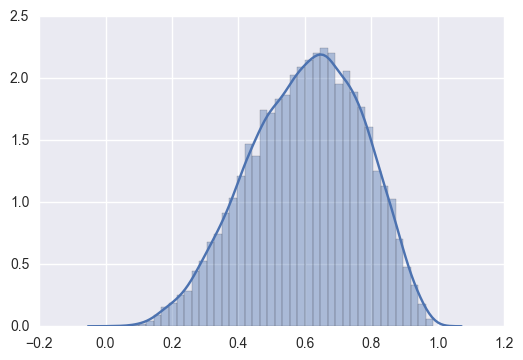

In [25]:
samples = np.random.beta(10, 3, N)
plot_left_skew(samples, 2)

It seems that square works pretty well.<br>
Now let's try how cube works!

Mean: 0.768242422599 Variance: 0.0130626346791
Skewness: 0.06048334526051811 Kurtosis: -0.6803588987498745


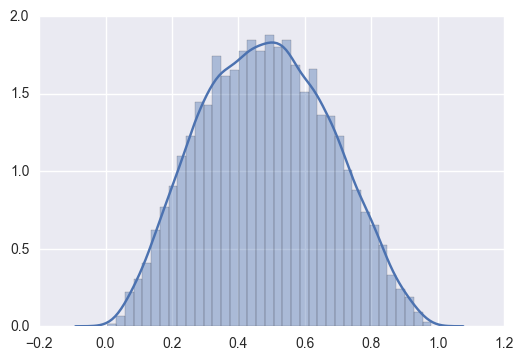

In [26]:
plot_left_skew(samples, 3)

It works even better!

---

## Conclusion
This notebook covers several basic statistic terms as well as some data preprocessing techniques with examples. There're still a lot concepts that we haven't talk about in this notebook. We'll cover more in the future.<br>
Thanks for reading. I hope that you can gain some insight from it.:) See you in the next part!

---

## Reference
Here are some great reference that really inspired me a lot.
- [Data transformation](http://fmwww.bc.edu/repec/bocode/t/transint.html)
    - This link covers a lot more detailed information on how to do data transformation.
- [Udemy course: Data science and machine learning in python](https://www.udemy.com/data-science-and-machine-learning-with-python-hands-on/)
    - Though this course is not free, it is a pretty good tutorial for those who want to take a look at machine learning in pyhton.
    - This course also covers both basic and a little advanced statistic concepts like T-test and p-value.
- [Degrees of freedom](https://www.youtube.com/watch?v=-4aiKmPC994)
    - Well explained what degrees of freedom is. The other videos of this series is also really great.
- [Simulation on sampling distribution](http://onlinestatbook.com/stat_sim/sampling_dist/index.html)
    - Take a look at this link if you want to see how central limit theorm works.